In [1]:
#https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
#dataset

In [1]:
import os
import zipfile
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.11.0


In [3]:
local_zip = 'dataset/kagglecatsanddogs_5340.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset/')
zip_ref.close()
print('Done')

Done


In [4]:
print(len(os.listdir('dataset/PetImages/Cat/')))
print(len(os.listdir('dataset/PetImages/Dog/')))

12501
12501


In [2]:
to_create = [
    'dataset/cats-v-dogs',
    'dataset/cats-v-dogs/training',
    'dataset/cats-v-dogs/testing',
    'dataset/cats-v-dogs/training/cats',
    'dataset/cats-v-dogs/training/dogs',
    'dataset/cats-v-dogs/testing/cats',
    'dataset/cats-v-dogs/testing/dogs'
]

for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

dataset/cats-v-dogs created
dataset/cats-v-dogs/training created
dataset/cats-v-dogs/testing created
dataset/cats-v-dogs/training/cats created
dataset/cats-v-dogs/training/dogs created
dataset/cats-v-dogs/testing/cats created
dataset/cats-v-dogs/testing/dogs created


In [3]:
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name # PetImages/Cats/0.jpg

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

CAT_SOURCE_DIR = r"dataset/PetImages/Cat/"
TRAINING_CATS_DIR = r"dataset/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = r"dataset/cats-v-dogs/testing/cats/"

DOG_SOURCE_DIR = r"dataset/PetImages/Dog/"
TRAINING_DOGS_DIR = r"dataset/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = r"dataset/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [4]:
print(len(os.listdir('dataset/cats-v-dogs/training/cats/')))
print(len(os.listdir('dataset/cats-v-dogs/training/dogs/')))
print(len(os.listdir('dataset/cats-v-dogs/testing/cats/')))
print(len(os.listdir('dataset/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [5]:
train_dir=r'dataset/cats-v-dogs/training/'
validation_dir=r'dataset/cats-v-dogs/testing/'

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), #fully connected layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11708\1804861863.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 - 73s - loss: 0.7478 - acc: 0.5180 - val_loss: 0.6925 - val_acc: 0.5880 - 73s/epoch - 734ms/step
Epoch 2/100
100/100 - 65s - loss: 0.6905 - acc: 0.5695 - val_loss: 0.6724 - val_acc: 0.6290 - 65s/epoch - 652ms/step
Epoch 3/100


C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


100/100 - 64s - loss: 0.6635 - acc: 0.5960 - val_loss: 0.6424 - val_acc: 0.6160 - 64s/epoch - 637ms/step
Epoch 4/100
100/100 - 62s - loss: 0.6387 - acc: 0.6250 - val_loss: 0.6527 - val_acc: 0.6240 - 62s/epoch - 623ms/step
Epoch 5/100
100/100 - 62s - loss: 0.6202 - acc: 0.6595 - val_loss: 0.5969 - val_acc: 0.6770 - 62s/epoch - 623ms/step
Epoch 6/100
100/100 - 61s - loss: 0.6123 - acc: 0.6500 - val_loss: 0.5491 - val_acc: 0.7190 - 61s/epoch - 613ms/step
Epoch 7/100



KeyboardInterrupt



In [ ]:
model.save('animal_model.h5')
print("Save")

In [9]:
model = tf.keras.models.load_model('animal_model.h5')

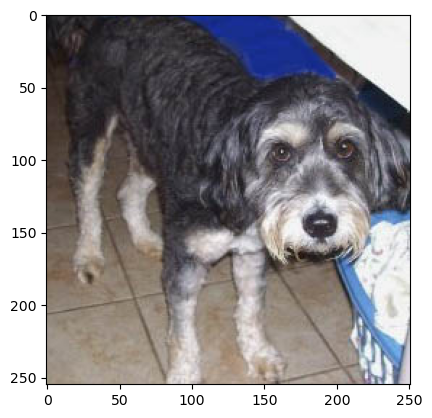

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
fname=r"dataset/cats-v-dogs/testing/dogs"
imagename="79.jpg"
img=image.load_img(fname+"/"+imagename)
plt.imshow(img)

In [26]:
#Testing
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow import keras
model1 = keras.models.load_model('animal_model.h5')

img=image.load_img(fname+"/"+imagename,target_size=(150,150))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model1.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(imagename + " is a dog")
else:
    print(imagename + " is a cat")

1/1 [==============================] - 0s 153ms/step
[1.]
79.jpg is a dog


# With Augumentation

In [ ]:
#With augumentation

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])


In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)


model.save("animal_model_withaugu.h5")

In [ ]:
import numpy as np
from keras.preprocessing import image
from tensorflow import keras
import matplotlib.pyplot as plt
model1 = keras.models.load_model('animal_model_withaugu.h5')
fname=r"dataset/cats-v-dogs/testing/dogs"
filen='35.jpg'
file=fname+"\\"+filen

#Show Image
img=image.load_img(file)
plt.imshow(img)



In [ ]:
#Predict Image
img=image.load_img(file,target_size=(150,150))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(filen + " is a dog")
else:
    print(filen + " is a cat")
